## Задание

### Вариант №2. Кластеризация данных. <br>

Данный вариант выполняется на основе материалов лекции. <br>

Необходимо решить задачу кластеризации на основе любого выбранного Вами датасета. <br>

Кластеризуйте данные с помощью трех различных алгоритмов кластеризации. Алгоритмы выбираются произвольным образом, рекомендуется использовать алгоритмы из лекции. <br>

Сравните качество кластеризации для трех алгоритмов с помощью следующих метрик качества кластеризации: <br>

- Adjusted Rand index
- Adjusted Mutual Information
- Homogeneity, completeness, V-measure
- Коэффициент силуэта
 <br>Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
%matplotlib inline 
sns.set(style="ticks")

TThe dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

In [254]:
data=pd.read_csv('/Users/user/Desktop/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [256]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [257]:
data.drop(["Serial No."], axis = 1, inplace=True)

In [258]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Кластеризация

### K-means

In [259]:
target=data['University Rating']
X = data.drop(['University Rating'], axis=1)

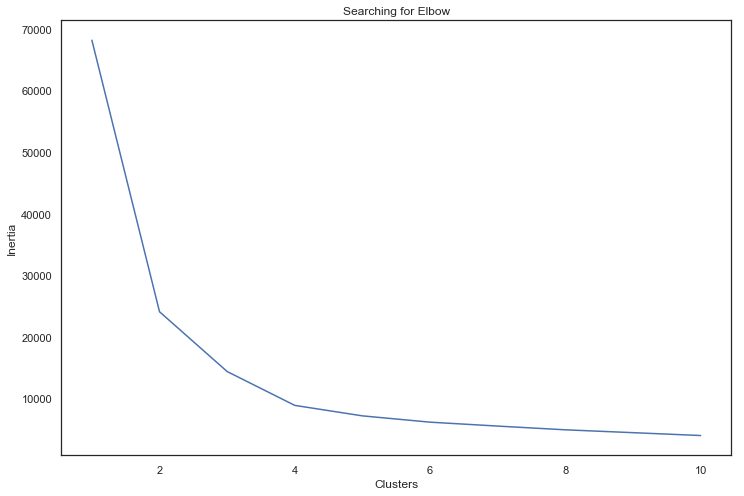

In [260]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

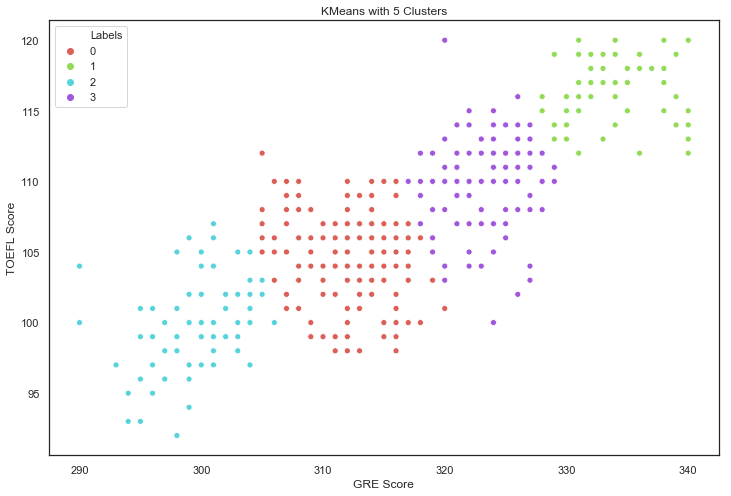

In [264]:
km5 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['GRE Score'], X['TOEFL Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 5 Clusters')
plt.show()



### Иерархическая кластеризация

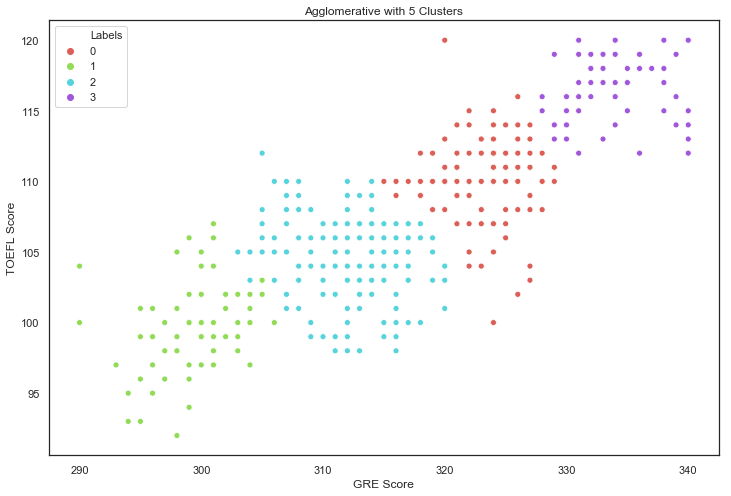

In [266]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['GRE Score'], X['TOEFL Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.title('Agglomerative with 5 Clusters')
plt.show()

### DBSCAN

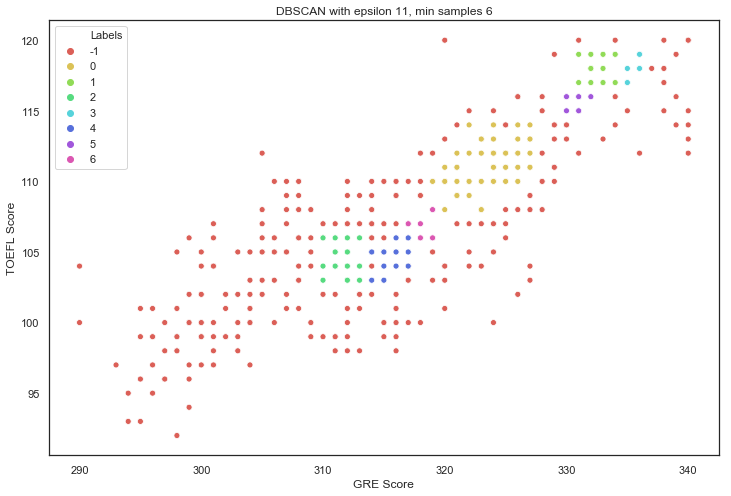

In [302]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=2, min_samples=10).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['GRE Score'], X['TOEFL Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## Метрики

In [303]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

algorithms = []
algorithms.append(KMeans(n_clusters=4, random_state=1))
algorithms.append(DBSCAN(eps=2, min_samples=10))
algorithms.append(AgglomerativeClustering(n_clusters=4))

y=target
data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'DBSCAN', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.167845,0.218413,0.226443,0.254430,0.239622,0.442864
DBSCAN,0.001334,0.082075,0.098998,0.138382,0.115423,-0.168741
Agglomerative,0.147047,0.208131,0.216269,0.241346,0.228120,0.413533


## __Вывод__
По данным полученным выше (ARI, AMI, Homogenity, Completeness, V-measure, Silhouette): <br> 
 - Наиболее качественную кластеризацию осуществляет метод K-means <br>
 - Самый худший результат у алгоритма DBSCAN